In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/raw_data/BTCUSDT_1h.csv")

# checking if timestamp has any gaps/duplicates
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp').reset_index(drop=True)
df = df.drop_duplicates(subset=['timestamp']).reset_index(drop=True)

# 1st lag of 'close' price
df['close_lag1'] = df['close'].shift(1)
df = df.dropna(subset=['close_lag1']).reset_index(drop=True)

# pct returns (P_t - P_{t-1})
df['pct_returns'] = np.log(df['close'].pct_change())
df = df.dropna(subset=['pct_returns']).reset_index(drop=True)

display(df)

d:\pricing-comparison\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\pricing-comparison\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,timestamp,open,high,low,close,volume,close_lag1,pct_returns
0,2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,7216.27,-5.603934
1,2020-01-01 05:00:00,7217.26,7229.76,7216.65,7224.21,344.670596,7217.27,-6.946930
2,2020-01-01 06:00:00,7224.24,7236.27,7221.51,7225.62,621.467023,7224.21,-8.541603
3,2020-01-01 10:00:00,7189.07,7210.00,7185.20,7202.00,537.762804,7188.77,-6.297788
4,2020-01-01 12:00:00,7197.20,7233.33,7196.15,7225.59,868.753580,7197.20,-5.535410
...,...,...,...,...,...,...,...,...
22305,2024-12-31 13:00:00,94539.86,96054.79,94524.43,95587.12,1803.501870,94539.85,-4.502835
22306,2024-12-31 14:00:00,95587.12,96250.00,95372.35,95679.17,1504.337170,95587.12,-6.945461
22307,2024-12-31 19:00:00,93875.69,94290.91,93712.45,94166.88,462.793420,93875.68,-5.775716
22308,2024-12-31 21:00:00,93564.01,93964.15,93504.67,93899.68,337.527150,93564.04,-5.630362


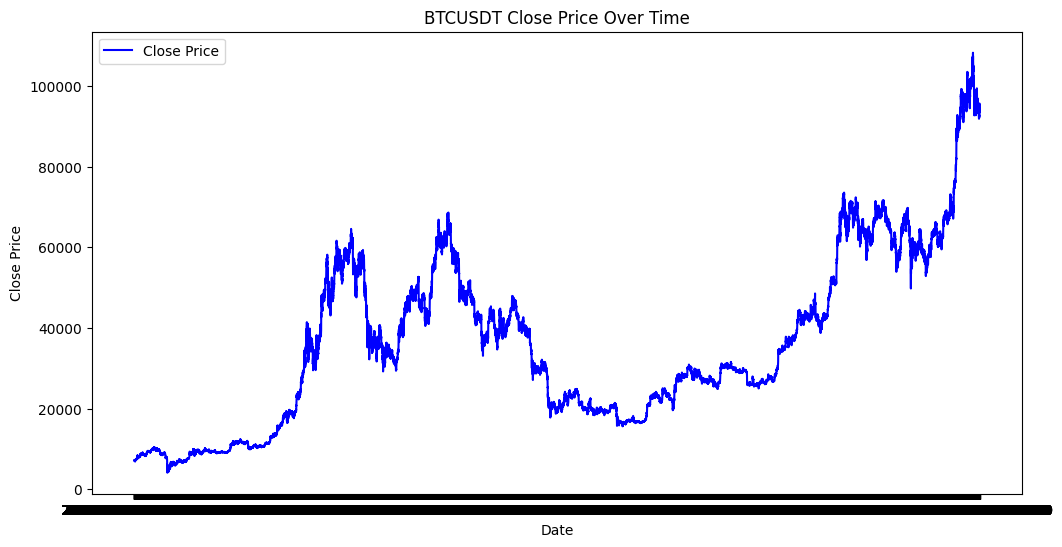

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Close Price', color='blue')
plt.title('BTCUSDT Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df['close_lag1'] = df['close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close_lag1'], label='Close Price', color='blue')
plt.title('BTCUSDT Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()